## Observations and Insights

## Dependencies and starter code

In [73]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
complete_data = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")

# print the data
complete_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [74]:
# Generate a summary statistics table of mean, median, variance,
# standard deviation, and SEM of the tumor volume for each regimen

# identify each variable by grouping by the drug regimen and looking in the tumor vol column
tumor_mean = complete_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_median = complete_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_var = complete_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_std = complete_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_sem = complete_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# create a table of all the information
summary_df = pd.DataFrame({
    "Mean Tumor Vol": tumor_mean,
    "Median Tumor Vol": tumor_median,
    "Tumor Vol Variance": tumor_var,
    "Tumor Vol Std. Dev.": tumor_std,
    "Tumor Vol Std. Error": tumor_sem
})

# print the table
summary_df

,Mean Tumor Vol,Median Tumor Vol,Tumor Vol Variance,Tumor Vol Std. Dev.,Tumor Vol Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

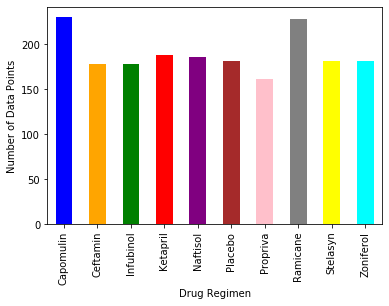

<Figure size 432x288 with 0 Axes>

In [77]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# count all the data points for each drug
count_drug = complete_data.groupby("Drug Regimen")["Drug Regimen"].count()

# different colors per drug
color_list = ["blue", "orange", "green", "red", "purple", "brown", "pink", "grey", "yellow", "aqua"]

# create the bar chart
drug_chart = count_drug.plot(kind="bar", color = color_list)

# add labels
drug_chart.set_ylabel("Number of Data Points")
plt.show()
plt.tight_layout()

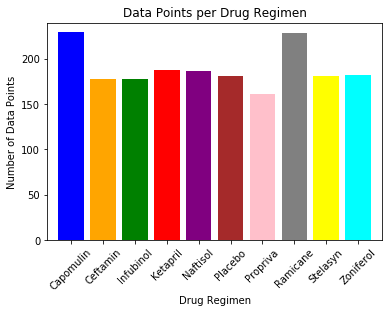

In [105]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# create an array of all the drugs in alphabetical order
drug_names = []
for drug in complete_data["Drug Regimen"]:
    if drug not in drug_names:
        drug_names.append(drug)
        drug_names = sorted(drug_names)

# create x axis and tick locations
x_axis = np.arange(0, len(drug_names))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

# add labels
plt.title("Data Points per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

# create x and y limits using count_drug created above
plt.xlim(-0.75, len(count_drug)-0.25)
plt.ylim(0, max(count_drug) + 10)

# put bar chart together, color the bars using the color_list above, and rotate x labels
plt.bar(x_axis, count_drug, color=color_list, align="center")
plt.xticks(tick_locations, drug_names)
plt.xticks(rotation=45)
plt.show()

## Pie plots

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen